### Exploratory data analysis (EDA)
This is the very first data analysis 
The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm.

#### Preparations
For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('NYSDOH_PNDS_IndividualProviderData_2012Q_20000_rows.csv') 

c:\users\nii\.conda\envs\nitor-infotech\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,68,70,72,74,78,79,80,81,82,83,84,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Lname,Fname,npi,licnum,medsid,planid,sitename,rmnumber,staddres,city,...,Lang3,Lang4,Lang5,Lang6,Lang7,areacode,phone,planno,plan,subtime
0,LIU,XIN-HUI,1.245565e+09,946.0,NaN,NaN,"LIU, XIN-HUI",NaN,42-11 College Point Blvd,FLUSHING,...,NaN,ZH,NaN,NaN,NaN,718.0,3219688.0,1234037.0,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
1,DU,KEPING,1.649397e+09,1481.0,NaN,NaN,"DU, KEPING",NaN,193 N Wellwood Ave,LINDENHURST,...,NaN,ZH,NaN,NaN,NaN,917.0,2997486.0,1234037.0,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
2,LI,CHANGSHENG,1.154555e+09,2681.0,NaN,NaN,CHANG SHENG LI,NaN,175 KING STREET,CHAPPAGUA,...,NaN,ZH,NaN,NaN,NaN,914.0,2380041.0,1234037.0,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
3,MOLLICA,PETER,1.285684e+09,3105.0,NaN,NaN,PETER W MOLLICA.,NaN,585 Schenectady Ave..,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,718.0,6045388.0,1234037.0,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00
4,HARRIS,MARIANTHA,1.275616e+09,3547.0,NaN,NaN,BRONX METRO HEALTHCARE MEDICAL PC,NaN,432 EAST 149 ST,BRONX,...,NaN,NaN,NaN,NaN,NaN,718.0,6187522.0,1234037.0,COMPREHENSIVE CARE MGMT,31MAR2012:24:00:00


### Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [4]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [5]:
df_num = df.select_dtypes(include = ['float64'])
df_num.head()

,npi,licnum,county,zip,zip4,wheelchr,Primdesg,provtype,primspec,secdspec,...,homecare_panl,pficert1,pficert2,pficert3,provpfi,tothours,eveind,areacode,phone,planno
0,1.245565e+09,946.0,81.0,11355.0,NaN,1.0,2.0,20.0,290.0,999.0,...,9999.0,9999.0,9999.0,9999.0,NaN,0.0,0.0,718.0,3219688.0,1234037.0
1,1.649397e+09,1481.0,103.0,11757.0,NaN,1.0,2.0,20.0,290.0,999.0,...,9999.0,9999.0,9999.0,9999.0,NaN,0.0,0.0,917.0,2997486.0,1234037.0
2,1.154555e+09,2681.0,119.0,10514.0,NaN,1.0,2.0,20.0,290.0,999.0,...,9999.0,9999.0,9999.0,9999.0,NaN,0.0,0.0,914.0,2380041.0,1234037.0
3,1.285684e+09,3105.0,47.0,11203.0,NaN,1.0,2.0,9.0,192.0,999.0,...,9999.0,9999.0,9999.0,9999.0,NaN,0.0,0.0,718.0,6045388.0,1234037.0
4,1.275616e+09,3547.0,5.0,10455.0,NaN,0.0,2.0,23.0,779.0,999.0,...,9999.0,9999.0,9999.0,9999.0,NaN,0.0,0.0,718.0,6187522.0,1234037.0


Now lets plot them all:

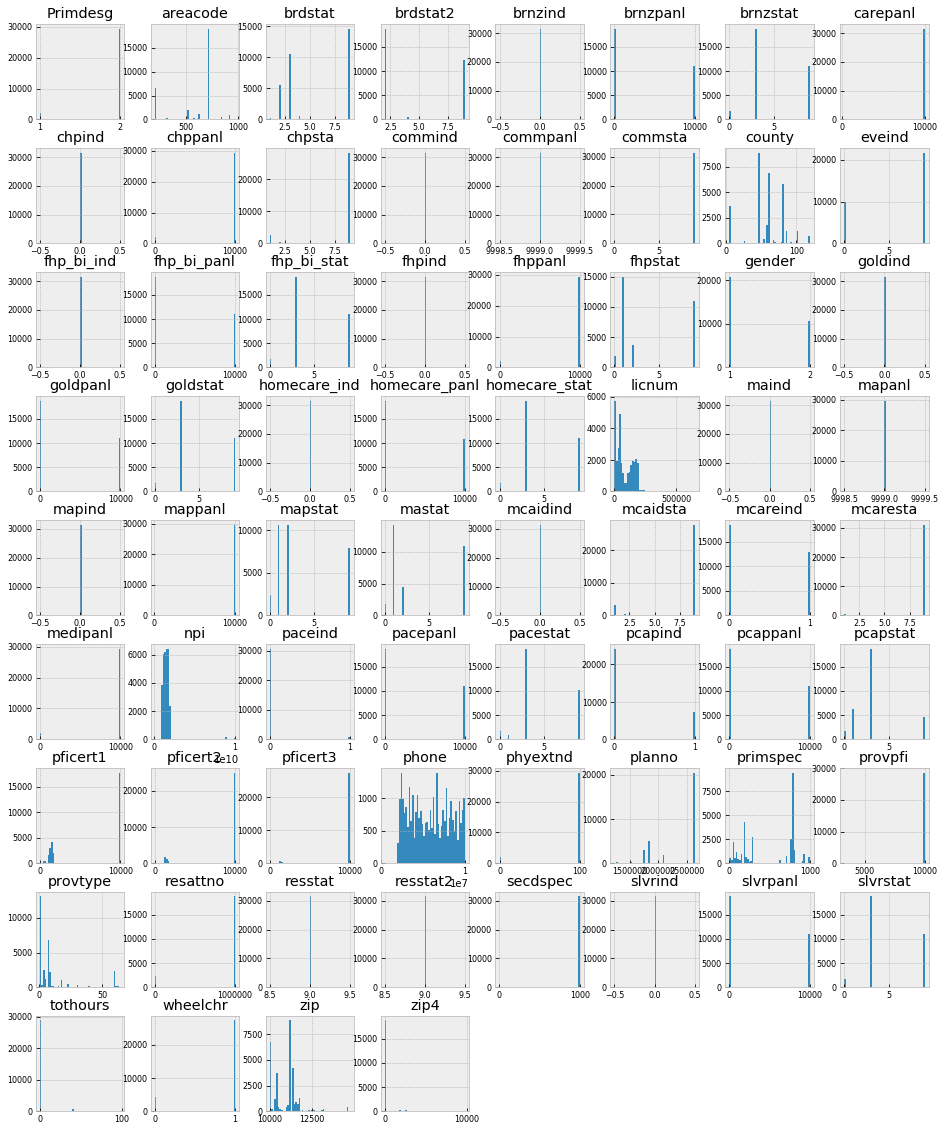

In [6]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

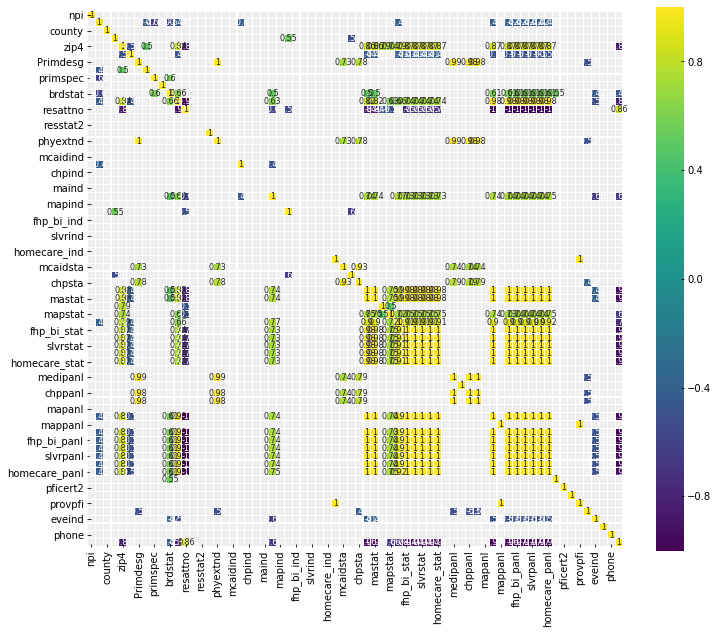

In [7]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### PCA for Data Visualization

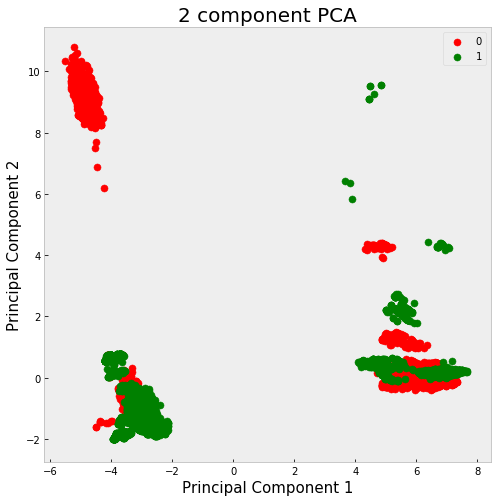

In [8]:
df.dropna(axis=0, how='all', inplace=True)
df_num = df.select_dtypes(include = ['float64'])
df_num = df_num.fillna(0)

# Separating out the features
x = df_num.loc[:, df_num.drop('mcareind', axis=1).columns].values
# Separating out the target
y = df_num.loc[:,['mcareind']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['mcareind']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['mcareind'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()